

# Laporan Proyek Machine Learning - Cahya Abdurrahman
 Dataset yang digunakan dalam proyek ini adalah "Anime Recommendations Database". Dataset ini merupakan kumpulan anime dari MyAnimeList yang berisi 12064 anime. Dataset ini memiliki 7 kolom dan 12064 baris. Data ini akan dibuat model rekomendasi anime menggunakan content based filtering.
   


# **Import Library**

Pada tahap ini, kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk pembangunan model rekomendasi

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# **Load Dataset**

In [2]:
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

In [3]:
merged_df = pd.merge(rating_df, anime_df, on='anime_id')

merged_df.head()


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395


# **About Dataset**
Dataset ini berisi informasi mengenai berbagai judul anime, termasuk genre, rating, dan tipe penayangan anime. 

Variabel pada dataset ini sebagai berikut:

Dari ```anime.csv```

**anime_id**:  ID unik untuk setiap anime.

**name**:  Judul anime.

**genre**: Kategori genre anime (misalnya: Action, Comedy, Drama, Fantasy).

**type**: Jenis anime (TV, Movie, OVA, dll).

**episodes**: Jumlah episode.

**rating**:  Rata-rata rating yang diberikan pengguna.

**members**: Jumlah pengguna yang telah memberi rating atau menonton anime tersebut.

Dari ```rating.csv```

**user_id**: ID unik pengguna.

**anime_id**: ID anime yang diberi rating.

**rating**: Nilai rating yang diberikan pengguna terhadap anime (skala 1–10, atau -1 jika tidak memberi rating).



# **Exploratory Data Analysis (EDA)**
Proses awal dalam analisis data yang bertujuan untuk memahami struktur, karakteristik, pola, dan hubungan dalam data sebelum dilakukan pemodelan atau analisis statistik lebih lanjut.

Melihat info pada dataframe anime

In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Melihat info pada dataframe rating

In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Melihat 5 data pertama pada dataframe anime

In [6]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Melihat tipe dan beberapa sample genre anime

In [7]:
print("Tipe anime:", anime_df['type'].value_counts())
print("\nGenre sample:", anime_df['genre'].dropna().iloc[0])

Tipe anime: type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

Genre sample: Drama, Romance, School, Supernatural


Melihat jumlah baris dan kolom pada dataframe anime dan rating

In [8]:
print("Jumlah baris dan kolom di anime dataframe:", anime_df.shape)

print("Jumlah baris dan kolom di rating dataframe:", rating_df.shape)

Jumlah baris dan kolom di anime dataframe: (12294, 7)
Jumlah baris dan kolom di rating dataframe: (7813737, 3)


Melihat missing values pada dataframe anime dan rating

In [9]:
print("\nMissing values per fitur in anime dataframe:")
print(anime_df.isnull().sum())

print("\nMissing values per fitur in rating dataframe:")
print(rating_df.isnull().sum())


Missing values per fitur in anime dataframe:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values per fitur in rating dataframe:
user_id     0
anime_id    0
rating      0
dtype: int64


Setelah dilihat, ternyata ada beberapa data pada dataframe anime yang memiliki missing value seperti genre, type, dan rating

Melihat data duplikat pada dataframe anime dan rating

In [10]:
duplicates = anime_df.duplicated()
duplicate_count = duplicates.sum()

rating_duplicates = rating_df.duplicated()
rating_duplicate_count = rating_duplicates.sum()

print(f"Number of duplicate rows in anime dataframe: {duplicate_count}")

print(f"Number of duplicate rows in rating dataframe: {rating_duplicate_count}")

Number of duplicate rows in anime dataframe: 0
Number of duplicate rows in rating dataframe: 1


Setelah dilihat, ternyata ada 1 data yang duplikat pada dataframe rating

**Visualisasi Data**

- Jumlah anime berdasarkan tipe penayangan

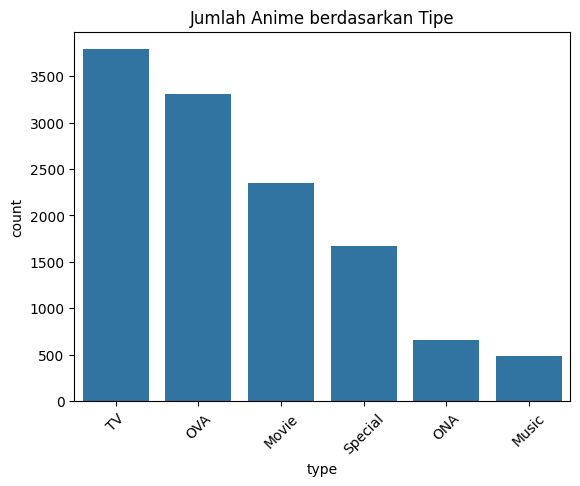

In [11]:
sns.countplot(data=anime_df, x='type', order=anime_df['type'].value_counts().index)
plt.title("Jumlah Anime berdasarkan Tipe")
plt.xticks(rotation=45)
plt.show()

Grafik menunjukkan bahwa anime tipe TV merupakan yang paling banyak diproduksi, disusul oleh OVA dan Movie. Sementara itu, tipe seperti Special, ONA, dan Music jumlahnya jauh lebih sedikit. Hal ini menunjukkan bahwa format TV masih menjadi media utama dalam distribusi anime, sedangkan tipe lain bersifat pelengkap atau lebih spesifik.

- Jumlah anime berdasarkan genre

C:\Users\Cahya\AppData\Local\Temp\ipykernel_18224\2387466951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')


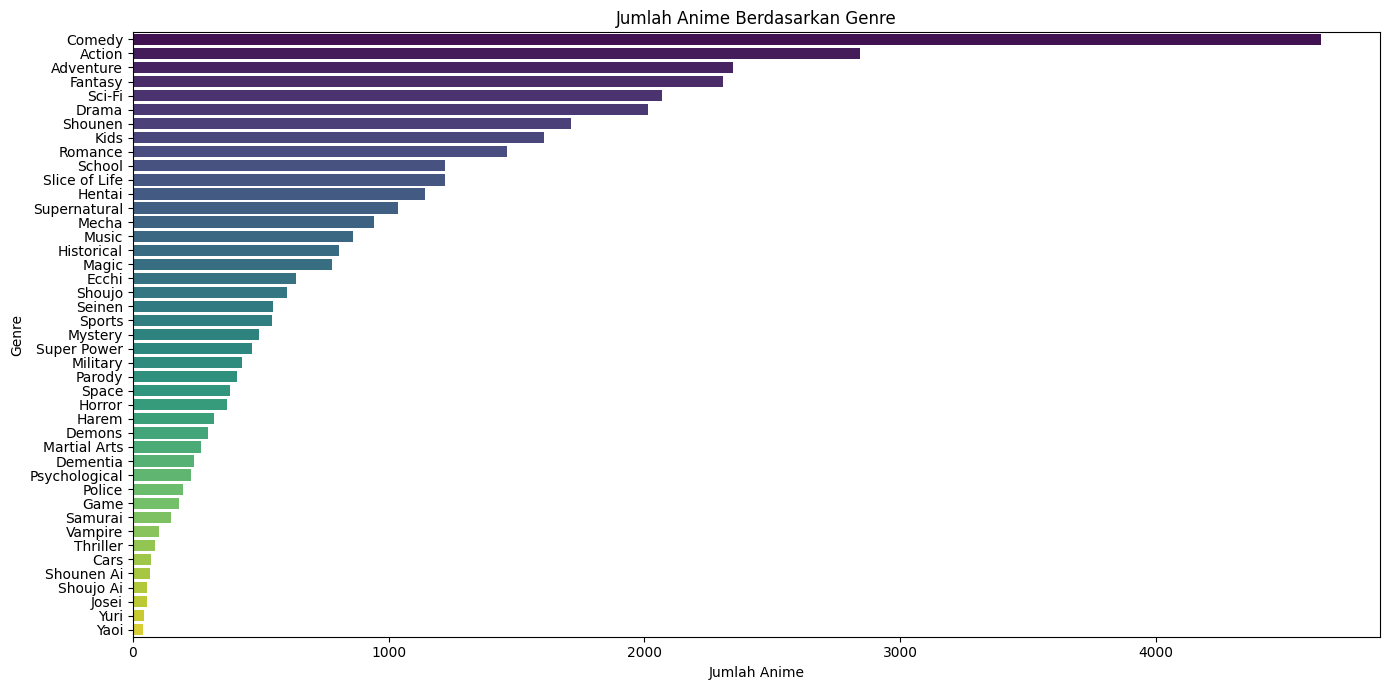

In [12]:
genre_series = anime_df['genre'].dropna()

# Pisah dan hitung semua genre
all_genres = []
for genre_str in genre_series:
    genres = genre_str.split(', ')
    all_genres.extend(genres)

# Hitung frekuensi setiap genre
from collections import Counter
genre_count = Counter(all_genres)

genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')
plt.title('Jumlah Anime Berdasarkan Genre')
plt.xlabel('Jumlah Anime')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa genre anime paling populer adalah Comedy, diikuti oleh Action, Adventure, dan Fantasy. Genre seperti Yaoi, Yuri, dan Josei memiliki jumlah anime yang jauh lebih sedikit. Ini mengindikasikan bahwa preferensi industri dan penonton cenderung fokus pada genre yang ringan dan penuh aksi, sementara genre-genre yang lebih spesifik atau bertarget niche memiliki representasi yang lebih kecil.

- Distribusi rating anime

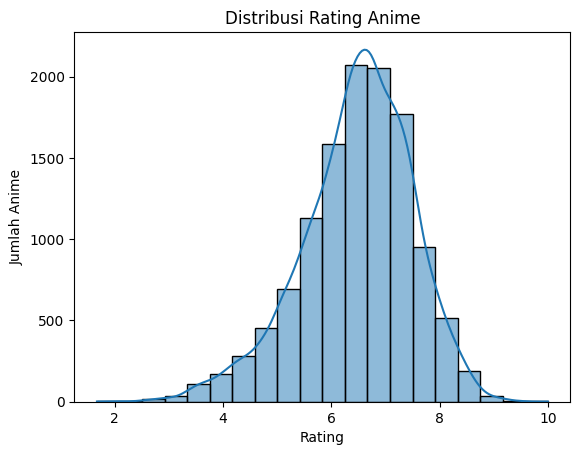

In [13]:
sns.histplot(anime_df['rating'].dropna(), bins=20, kde=True)
plt.title("Distribusi Rating Anime")
plt.xlabel("Rating")
plt.ylabel("Jumlah Anime")
plt.show()


Grafik distribusi rating anime menunjukkan pola yang menyerupai kurva normal, dengan sebagian besar anime memiliki rating di kisaran 6 hingga 8. Sangat sedikit anime yang mendapatkan rating di bawah 4 atau di atas 9. 

- Distribusi rating pengguna

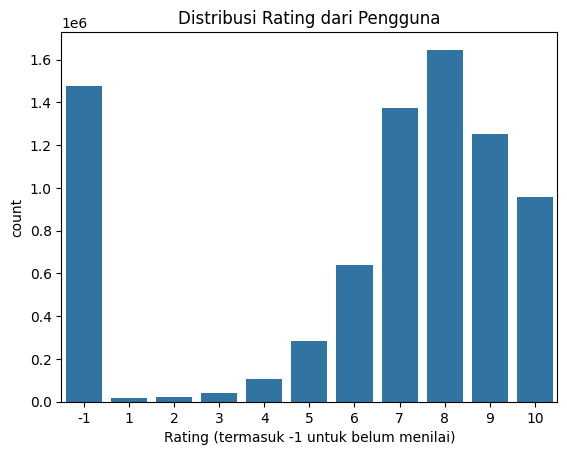

In [14]:
sns.countplot(data=rating_df, x='rating')
plt.title("Distribusi Rating dari Pengguna")
plt.xlabel("Rating (termasuk -1 untuk belum menilai)")
plt.show()

Grafik menunjukkan kebanyakkan user menilai anime dengan score 8. Selain itu, banyak juga user yang belum menilai anime yang ditonton

- Anime top 10 berdasarkan jumlah rating pengguna

C:\Users\Cahya\AppData\Local\Temp\ipykernel_18224\333384752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_anime.values, y=top_anime.index, palette="viridis")


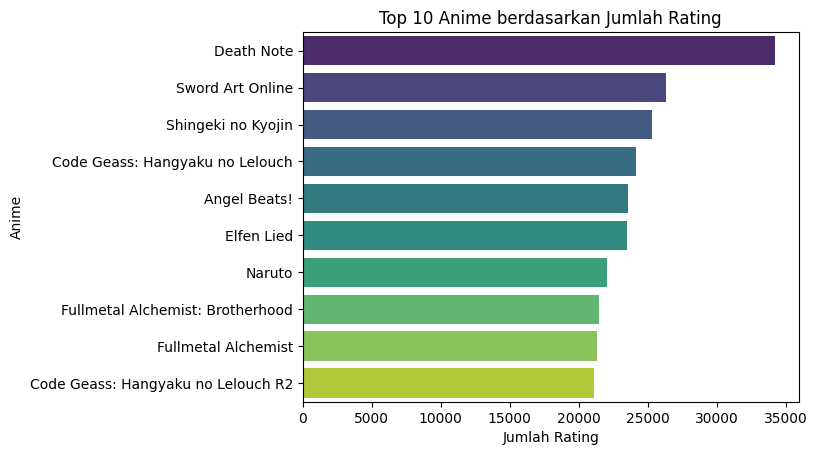

In [15]:
top_anime = merged_df[merged_df['rating_x'] > 0].groupby('name')['rating_x'].count().sort_values(ascending=False).head(10)

sns.barplot(x=top_anime.values, y=top_anime.index, palette="viridis")
plt.title("Top 10 Anime berdasarkan Jumlah Rating")
plt.xlabel("Jumlah Rating")
plt.ylabel("Anime")
plt.show()


Grafik ini menunjukkan bahwa "Death Note" adalah anime dengan jumlah rating terbanyak secara signifikan, diikuti oleh "Sword Art Online" dan "Shingeki no Kyojin". Kehadiran dua seri dari "Code Geass" (original dan R2) serta "Fullmetal Alchemist" (original dan Brotherhood) dalam daftar ini menunjukkan popularitas dan basis penggemar yang kuat untuk franchise tersebut. 

# **Data Preparation**

Pada tahap ini, data preparation adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model rekomendasi. Data mentah sering kali mengandung nilai kosong, duplikasi yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar modeling berjalan optimal.


**Menghapus missing value**

In [16]:
print("Jumlah missing values sebelum dibersihkan (anime_df):")
print(anime_df.isnull().sum())
print("="*50)

anime_df = anime_df.dropna(subset=['rating'])

# Genre kosong diisi dengan string kosong
anime_df['genre'] = anime_df['genre'].fillna('')
print("Hasil akhir setelah dihapus missing value")
print(anime_df.isnull().sum())


Jumlah missing values sebelum dibersihkan (anime_df):
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
Hasil akhir setelah dihapus missing value
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


Awalnya ada beberapa data yang memiliki masing value seperti genre, type, dan rating. Setelah di drop data sudah tidak memiliki missing value 

**Menghilangkan data duplikat**

In [17]:
# Cek dan hapus duplikat di anime_df berdasarkan anime_id
before = anime_df.shape[0]
anime_df = anime_df.drop_duplicates(subset='anime_id')
after = anime_df.shape[0]
print(f"Duplikat yang dihapus dari anime_df: {before - after}")


Duplikat yang dihapus dari anime_df: 0


Setelah diperiksa, ternyata tidak ada data yang duplikat pada dataset

**Menghilangkan koma pada genre**

In [18]:
anime_df['genre'] = anime_df['genre'].str.replace(',', ' ')


**Mengubah frasa multi-kata spesifik yang ingin dipertahankan sebagai satu token**

In [19]:


anime_df['genre'] = anime_df['genre'].str.replace(r'slice of life', 'slice_of_life', regex=True)
anime_df['genre'] = anime_df['genre'].str.replace(r'sci fi', 'sci_fi', regex=True)
anime_df['genre'] = anime_df['genre'].str.replace(r'martial arts', 'martial_arts', regex=True)
anime_df['genre'] = anime_df['genre'].str.replace(r'super power', 'super_power', regex=True)


**TF-IDF Transformation**

TF-IDF (Term Frequency - Inverse Document Frequency) dilakukan untuk mengubah genre anime menjadi bentuk numerik yang nantinya diproses oleh model

In [20]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(anime_df['genre'])


print("Jumlah anime:", tfidf_matrix.shape[0])
print("Jumlah fitur unik (genre):", tfidf_matrix.shape[1])

genres = tfidf.get_feature_names_out()
print("Genre unik yang ditemukan:")
print(genres)

tfidf_matrix.shape
tfidf_matrix.todense()

Jumlah anime: 12064
Jumlah fitur unik (genre): 47
Genre unik yang ditemukan:
['action' 'adventure' 'ai' 'arts' 'cars' 'comedy' 'dementia' 'demons'
 'drama' 'ecchi' 'fantasy' 'fi' 'game' 'harem' 'hentai' 'historical'
 'horror' 'josei' 'kids' 'life' 'magic' 'martial' 'mecha' 'military'
 'music' 'mystery' 'of' 'parody' 'police' 'power' 'psychological'
 'romance' 'samurai' 'school' 'sci' 'seinen' 'shoujo' 'shounen' 'slice'
 'space' 'sports' 'super' 'supernatural' 'thriller' 'vampire' 'yaoi'
 'yuri']


matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2950953 , 0.31637103, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25174628, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Hasilnya berupa matriks dengan ukuran **jumlah_anime** dan **jumlah_genre**

# **Sistem Rekomendasi - Content Based Filtering**

Pendekatan ini merekomendasikan item berdasarkan kesamaan karakteristik item tersebut. Dalam kasus ini, genre anime akan digunakan sebagai dasar kemiripan.

**Cosine Similarity**

Cosine similarity digunakan untuk merekomendasikan anime berdasarkan kesamaan genre. Metode ini mengukur sudut antar vektor dan menghasilkan nilai antara 0 sampai 1, di mana semakin mendekati 1 berarti semakin mirip.

In [24]:
cosine_sim = cosine_similarity(tfidf_matrix)

print("Shape cosine similarity matrix:", cosine_sim.shape)

pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=anime_df.name
).sample(20, axis=1).sample(10, axis=0)


Shape cosine similarity matrix: (12064, 12064)


,seinen,fantasy,thriller,samurai,police,supernatural,drama,sports,slice,parody,super,military,cars,kids,ai,martial,romance,space,josei,horror
name,,,,,,,,,,,,,,,,,,,,
Kujakuou: Sengoku Tensei,0.0,0.000000,0.0,0.0,0.0,0.472523,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Orange: Mirai,0.0,0.000000,0.0,0.0,0.0,0.000000,0.363634,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.404919,0.0,0.0,0.0
Overlord: Ple Ple Pleiades (OVA),0.0,0.478119,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Sprite: Between Two Worlds,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.492208,0.0,0.0,0.0
Perman (1983),0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.549515,0.0,0.0,0.387465,0.0,0.0,0.000000,0.0,0.0,0.0
Fukigen na Mononokean,0.0,0.000000,0.0,0.0,0.0,0.870795,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
GetBackers,0.0,0.000000,0.0,0.0,0.0,0.361532,0.291047,0.0,0.0,0.0,0.444038,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Dokkaebi Bangmang-I,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Lodoss-tou Senki: Eiyuu Kishi Den,0.0,0.370975,0.0,0.0,0.0,0.000000,0.388363,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.432455,0.0,0.0,0.0


**Mapping name to index**

In [25]:
indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

Mapping dilakukan untuk membuat struktur data yang memungkinkan dengan cepat mencari index dari sebuah anime berdasarkan namanya (name).

**Sistem Rekomendasi**

Untuk memberikan rekomendasi anime berdasarkan judul input dan kemiripan konten (similarity) dengan anime lain, menggunakan cosine similarity matrix.


In [26]:
def get_recommendations(title, cosine_sim=cosine_sim, top_k=5):
    if title not in indices:
        return f"'{title}' tidak ditemukan."

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_k+1]
    anime_indices = [i[0] for i in sim_scores]

    return anime_df[['name', 'genre', 'type']].iloc[anime_indices].reset_index(drop=True)


**Menjalankan Sistem Rekomendasi**

In [518]:
print(get_recommendations("Bakemonogatari"))

                               name  \
0  Monogatari Series: Second Season   
1    Kizumonogatari I: Tekketsu-hen   
2                    Vampire Holmes   
3   Kizumonogatari II: Nekketsu-hen   
4             Vampire Knight Guilty   

                                               genre   type  
0    Comedy  Mystery  Romance  Supernatural  Vampire     TV  
1                     Mystery  Supernatural  Vampire  Movie  
2             Comedy  Mystery  Supernatural  Vampire     TV  
3             Action  Mystery  Supernatural  Vampire  Movie  
4  Drama  Mystery  Romance  Shoujo  Supernatural ...     TV  


Disini sistem rekomendasi dicoba dengan anime bernama ```Bakemonogatari``` yang memiliki genre mystery, romance, supernatural, dan vampire. Sistem rekomendasi dapat memberikan output 5 anime yang mirip dengan ```Bakemonogatari``` dengan genre yang mirip, yaitu:

- **Monogatari series: second season** dengan genre ```comedy```, ```mystery```, ```romance```, ```supernatural```, dan ```vampire```. 
- **Kizumonogatari I: Tekketsu-hen** dengan genre ```mystery```, ```supernatural```, dan ```vampire```. 
- **Vampire Holmes** dengan genre ```action```, ```mystery```,  ```supernatural```, dan ```vampire```. 
- **Kizumonogatari II: Nekketsu-hen** dengan genre ```comedy```, ```mystery```, ```romance```, ```supernatural```, dan ```vampire```.
- **Vampire Knight Guilty** dengan genre ```drama```, ```mystery```, ```romance```, ```shoujo```, ```supernatural``` dan ```vampire```. 

# **Evaluasi Model Rekomendasi**

Model akan diuji menggunakan metrik Precision@K. Precision mengukur seberapa banyak dari K item yang direkomendasikan benar-benar relevan dengan item input. 

In [27]:
def assess_recommendations(query_title, df, similarity_matrix, k=5):
    if query_title not in indices:
        return f"Judul '{query_title}' tidak tersedia dalam dataset."

    query_index = indices[query_title]
    base_genre = df.loc[query_index, 'genre']
    genre_set = set(base_genre.lower().split()) if pd.notna(base_genre) else set()

    threshold = 2 if len(genre_set) >= 3 else 1

    similarity_rank = sorted(
        [(i, score) for i, score in enumerate(similarity_matrix[query_index]) if i != query_index],
        key=lambda x: x[1],
        reverse=True
    )

    top_matches = [i for i, _ in similarity_rank[:k]]
    results_df = df.iloc[top_matches].copy()  # Copy untuk keamanan

    relevancy_flags = []
    for genre_string in results_df['genre']:
        comparison_set = set(str(genre_string).lower().split()) if pd.notna(genre_string) else set()
        overlap = genre_set.intersection(comparison_set)
        relevancy_flags.append(len(overlap) >= threshold)

    score = sum(relevancy_flags)
    precision_score = score / k

    relevant_titles = results_df.iloc[[i for i, rel in enumerate(relevancy_flags) if rel]]['name'].tolist()
    irrelevant_titles = results_df.iloc[[i for i, rel in enumerate(relevancy_flags) if not rel]]['name'].tolist()

    return {
        'Title': query_title,
        'Top K': k,
        'Matches Found': k,
        'Matches Relevant': score,
        'Matches Irrelevant': k - score,
        'Precision@K': precision_score,
        'Relevant Titles': relevant_titles,
        'Irrelevant Titles': irrelevant_titles
    }


In [28]:
result = assess_recommendations("Bakemonogatari", anime_df, cosine_sim)
print(result)


{'Title': 'Bakemonogatari', 'Top K': 5, 'Matches Found': 5, 'Matches Relevant': 5, 'Matches Irrelevant': 0, 'Precision@K': 1.0, 'Relevant Titles': ['Monogatari Series: Second Season', 'Kizumonogatari I: Tekketsu-hen', 'Vampire Holmes', 'Kizumonogatari II: Nekketsu-hen', 'Vampire Knight Guilty'], 'Irrelevant Titles': []}
